In [1]:
import networkx as nx
import community
from community import community_louvain
import numpy as np
import copy  
import matplotlib.pyplot as plt
import collections
import graph_ase_BNU
from sklearn.utils.extmath import randomized_svd
import collections
from itertools import compress
import copy
import lcc_BNU
import pandas as pd
import seaborn as sns

In [14]:
def ase_graph(G): 
    sorted_vertex = sorted(G.nodes())
    A = nx.to_scipy_sparse_matrix(G, nodelist=sorted_vertex)
    n = G.number_of_nodes()
    max_dim = max_dim_ase
    
    svd_seed = 1234
    U, Sigma, VT = randomized_svd(A, 
                              n_components=min(max_dim, n - 1),
                              n_iter=50,
                              random_state=svd_seed)

    ##print ("dimension reduction (elbow selection)")
    #rank_graph =  getElbows_BNU.getElbows(Sigma, n_elbows=elb)
    
    #reduced_dim = rank_graph[(elb-1)]
    ##print ("elbow is %d" %reduced_dim)

    reduced_dim = 2 
    s_sqrt = np.sqrt(Sigma) 

    
    s_sqrt_dim_reduced = s_sqrt[:reduced_dim]
    U_dim_reduced = U[:, :reduced_dim ]
    VT_dim_reduced =VT[:reduced_dim, :]

    Xhat = np.multiply( s_sqrt_dim_reduced, U_dim_reduced)
    
    embedded_dict = {}
    for _, vertex in enumerate(sorted_vertex):
        embedded_dict[vertex] = Xhat[_, :]
     
    
    embedded = collections.namedtuple('embedded', 'Xhat vertex_labels dict')
    result = embedded(Xhat = Xhat, vertex_labels = sorted_vertex, dict = embedded_dict)
    
    return result

def sqdist(vector):
    return sum(x*x for x in vector)

def degtrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_min(G, min_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] <= min_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_minmax(G, percent_threshold):

    tmpG = copy.deepcopy(G)
    sorted_degrees_desc = sorted(G.degree, key=lambda x: x[1], reverse=True)
    sorted_degrees_asc = sorted(G.degree, key=lambda x: x[1], reverse=False)
    count_threshold = int(percent_threshold * G.number_of_nodes())
    ctr = 0 
    if ctr <= count_threshold:
        high_trim = sorted_degrees_desc[ctr][0]
        low_trim = sorted_degrees_asc[ctr][0]
        tmpG.remove_node(high_trim)
        tmpG.remove_node(low_trim)
        ctr += 1
        

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

#procrustes
def procrustes(A, B):
    tmp = A.T @ B
    U_tmp, Sigma_tmp, VT_tmp = np.linalg.svd(tmp)
    W = U_tmp @ VT_tmp
    return W
    #A@W - B

In [138]:
G = Gnoise
vertex_list=[]
degree_list=[]
for vertex in sorted(G.nodes()):
    vertex_list.append(vertex)
    degree_list.append(G.degree[vertex])

print(vertex_list)
print(degree_list)

sorted_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)

print(sorted_degrees)

sorted_degrees[1][0]

['100', '101', '103', '104', '107', '108', '109', '11', '110', '112', '113', '114', '115', '116', '118', '123', '124', '126', '128', '13', '132', '137', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '151', '153', '154', '155', '156', '157', '158', '16', '160', '161', '162', '163', '165', '167', '169', '17', '170', '175', '176', '177', '178', '18', '180', '2', '22', '23', '26', '27', '29', '30', '32', '33', '38', '39', '4', '41', '47', '48', '49', '50', '51', '53', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '70', '76', '77', '78', '79', '81', '82', '86', '87', '88', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
[9, 12, 15, 9, 15, 15, 10, 3, 13, 10, 10, 86, 11, 7, 12, 80, 13, 12, 12, 11, 9, 81, 82, 12, 14, 10, 11, 0, 13, 16, 13, 12, 10, 11, 9, 14, 11, 6, 2, 78, 11, 15, 2, 12, 10, 16, 15, 14, 11, 7, 76, 11, 13, 8, 12, 0, 12, 78, 15, 16, 75, 78, 0, 12, 14, 14, 14, 11, 79, 9, 11, 12, 15, 7, 11, 13, 11, 11, 11, 12, 9, 16, 10, 

'139'

In [146]:
m = degtrim_minmax(Gnoise, 1)
m.mod
sorted(m.G.degree, key=lambda x: x[1], reverse=True)
m.G.number_of_nodes()

104

In [147]:
Gnoise.number_of_nodes()

106

In [3]:
file_108 = r'/Users/z/Desktop/execs_email_t108.txt'
file_109 = r'/Users/z/Desktop/execs_email_t109.txt'


In [4]:
G108 = nx.read_weighted_edgelist(file_108, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')
G109 = nx.read_weighted_edgelist(file_109, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')


In [5]:
print(G108.size())
print(G108.number_of_nodes())
print(G109.size())
print(G109.number_of_nodes())

136
88
166
98


In [5]:
Gworld =  G108
Gworld.add_nodes_from(G109)
world_n = Gworld.number_of_nodes()
world_sorted_vertex = sorted(Gworld.nodes())
print(world_n)

print(Gworld.number_of_edges())

106
136


In [6]:
pi_plus = 0.1
s_Wplus = np.random.binomial(n=1, p=pi_plus, size=world_n)
s_Wplus_bool = list(map(bool,s_Wplus))
Wplus = sorted(list(compress(world_sorted_vertex, s_Wplus_bool)))

pi_minus = 0.1
s_Wminus = np.random.binomial(n=1, p=pi_minus, size=world_n)
s_Wminus_bool = list(map(bool,s_Wminus))
Wminus0 = list(compress(world_sorted_vertex, s_Wminus_bool))
#del any Wminus that is in Wplus:
Wminus = sorted(list(set(Wminus0) - set(Wplus)))


# print(Wplus)
# print(Wminus0)
# print(Wminus)


In [7]:
Vplus_candidate = list(set(world_sorted_vertex) - set(Wminus))
Vminus_candidate = list(set(world_sorted_vertex) - set(Wplus))

Gnoise = copy.deepcopy(Gworld)
p_plus = 0.3
for vertex in Wplus:
    for target in Vplus_candidate:
        s = np.random.binomial(n=1, p=p_plus, size=1)
        if s ==1 :
            if vertex != target:
                Gnoise.add_edge(vertex, target) 
    
print(Gnoise.number_of_nodes())
print(Gnoise.number_of_edges())

p_minus = 0.3
for vertex in Wminus:
    for target in Vminus_candidate:
        s = np.random.binomial(n=1, p=p_minus, size=1)
        if s ==1 :
            if Gnoise.has_edge(vertex, target):
                Gnoise.remove_edge(vertex, target) 
                
print(Gnoise.number_of_nodes())
print(Gnoise.number_of_edges())

106
404
106
396


In [8]:
Graph = copy.deepcopy(G108)
louvain_G108 = community.best_partition(Graph, resolution=1, randomize=False)
mod_G108 = community.modularity(louvain_G108, Graph)
print(mod_G108)

0.7797091262975778


In [9]:

Graph = copy.deepcopy(Gnoise)
louvain_Gnoise = community.best_partition(Graph, resolution=1, randomize=False)
mod_Gnoise = community.modularity(louvain_Gnoise, Graph)
print(mod_Gnoise)

0.31976966636057547


In [49]:
G0 = lcc_BNU.extract_lcc(G108)

G1 = lcc_BNU.extract_lcc(Gnoise)

intersecting_G0_noise =   set(G0.nodes()).intersection(set(G1.nodes()))

remove_from_G0 = set(G0.nodes())-set(G1.nodes())
G0_shared_G1 = copy.deepcopy(G0)
for vertex in list(remove_from_G0):
    G0_shared_G1.remove_node(vertex)

print(G0.number_of_nodes())
print(G0_shared_G1.number_of_nodes())
    

remove_from_G1 = set(G1.nodes())-set(G0.nodes())
G1_shared_G0 = copy.deepcopy(G1)
for vertex in list(remove_from_G1):
    G1_shared_G0.remove_node(vertex)


print(G1.number_of_nodes())
print(G1_shared_G0.number_of_nodes())

62
61
102
61


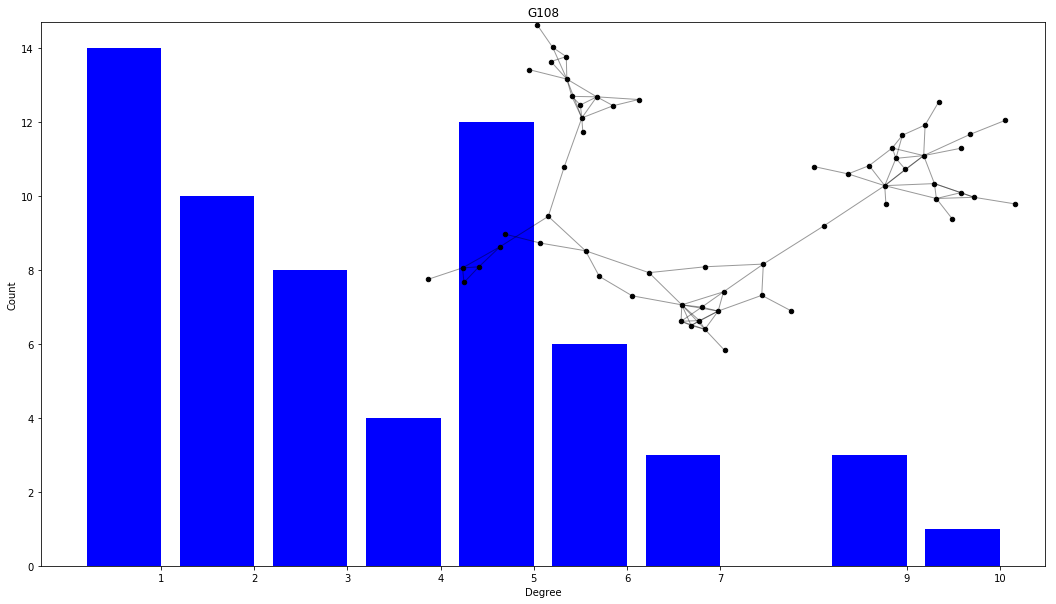

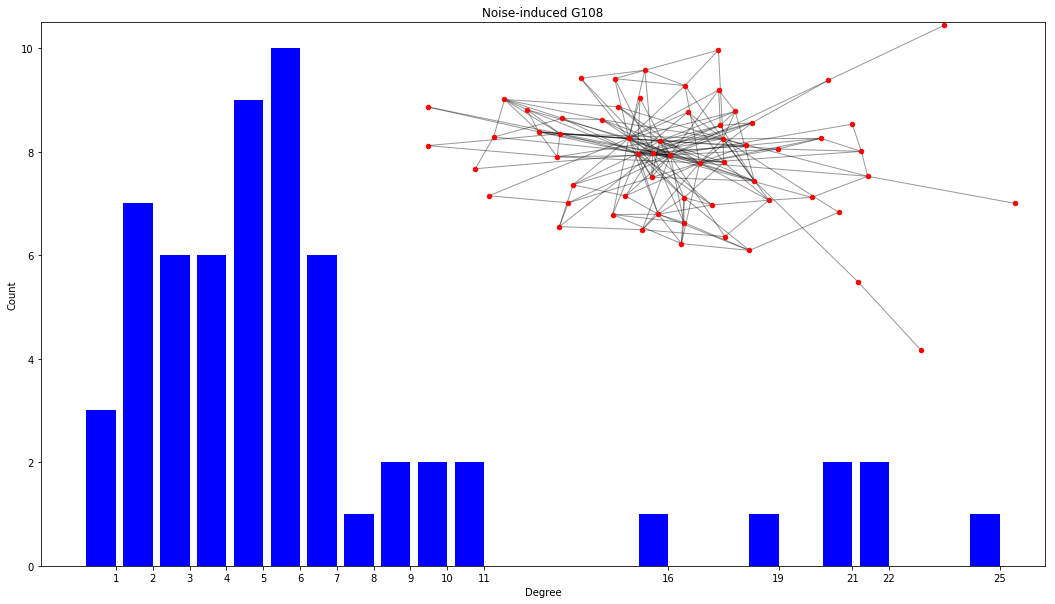

In [53]:
G = G0_shared_G1

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("G108")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.4)


G = G1_shared_G0

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Noise-induced G108")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

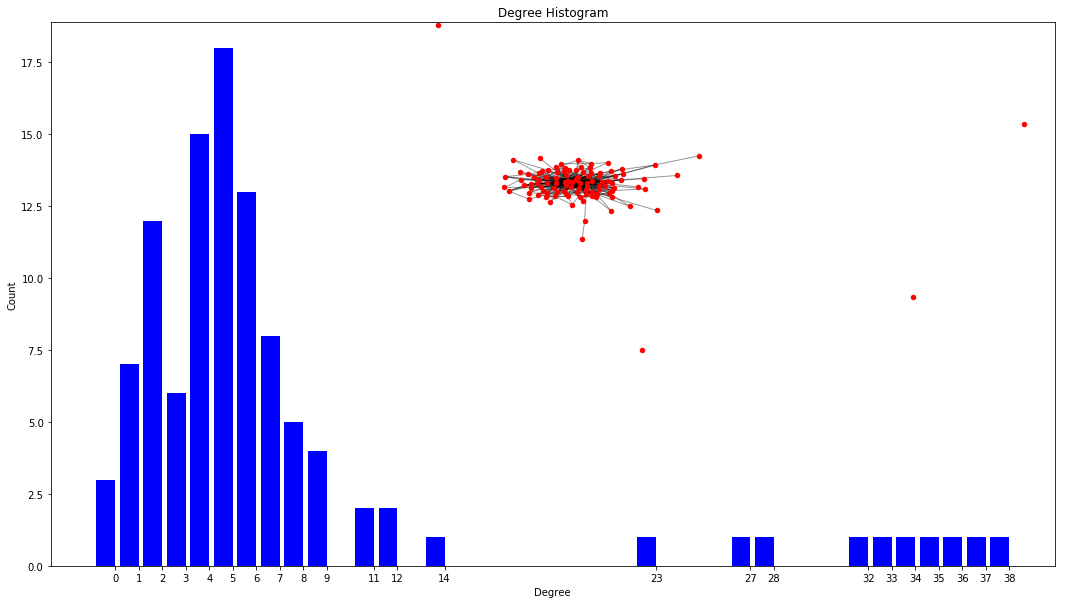

In [11]:
G = Gnoise

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Noise-induced Graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

deg_Gnoise = deg

In [61]:
print(deg_Gnoise)
print(deg_G108)


(86, 82, 81, 80, 79, 78, 76, 75, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 3, 2, 0)
(11, 9, 7, 6, 5, 4, 3, 2, 1, 0)


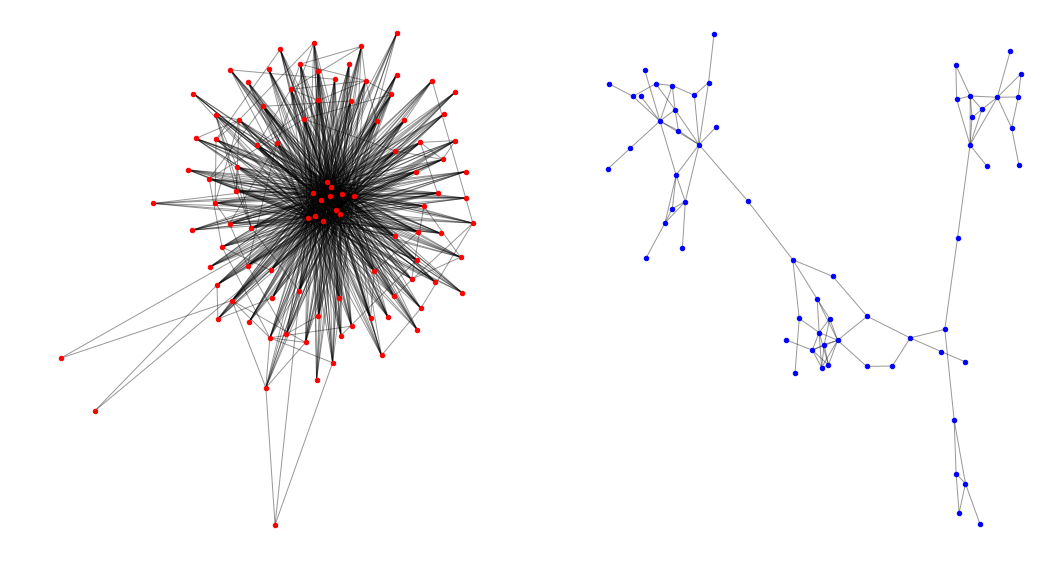

In [73]:
G = lcc_BNU.extract_lcc(Gnoise)

fig, ax = plt.subplots(figsize=(18,10))

plt.title("Gnoise_lcc")

plt.subplot(1, 2, 1)

Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.subplot(1, 2, 2)
G2 = lcc_BNU.extract_lcc(G108)

Gcc = sorted(nx.connected_component_subgraphs(G2), key=len, reverse=True)[0]
pos = nx.spring_layout(G2)
plt.axis('off')
nx.draw_networkx_nodes(G2, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(G2, pos, alpha=0.4)

plt.show()

In [115]:
graphs_modularity1 = []
graphs_maxdeg = []
max_deg_list = deg_Gnoise[0:10]

G_trimmed_new = Gnoise
for max_deg in max_deg_list:
    Gtrim_mod = degtrim_max(G_trimmed_new, max_deg)
    G_trimmed_new = Gtrim_mod.G
    graphs_maxdeg.append(max_deg)
    graphs_modularity1.append(Gtrim_mod.mod) 
G_trim_high = G_trimmed_new

print (graphs_modularity1)
print (graphs_maxdeg)

[0.10515646558720881, 0.10515646558720881, 0.11161782973946985, 0.11161782973946985, 0.14046508875739647, 0.14046508875739647, 0.15143440453686202, 0.15143440453686202, 0.8091535965386698, 0.8091535965386698]
[86, 82, 81, 80, 79, 78, 76, 75, 16, 15]


[Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

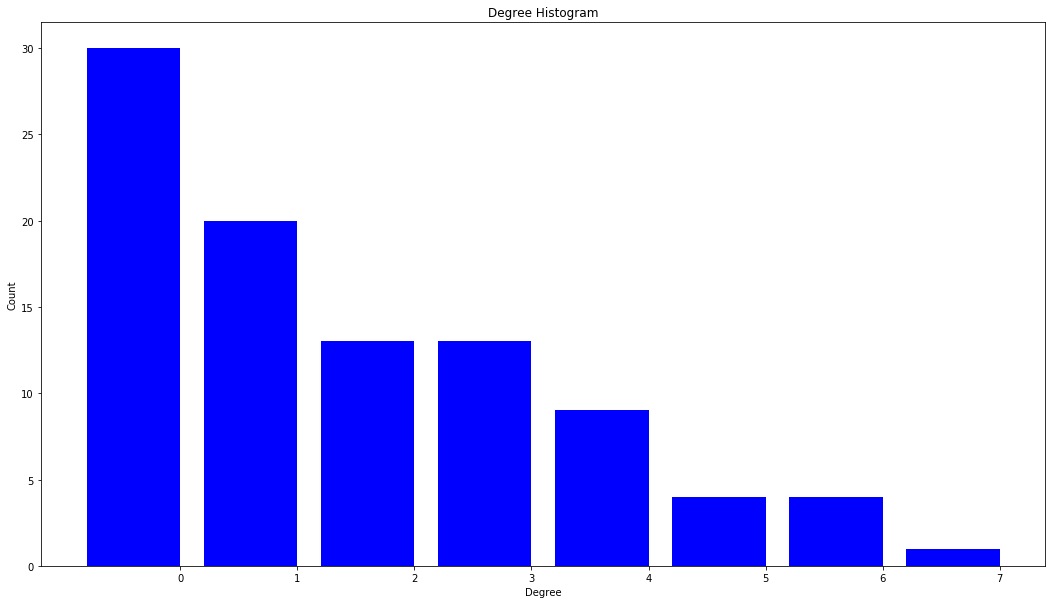

In [117]:
G = G_trim_high

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

In [82]:
sorted(min_deg_list)

[0, 2, 3, 6, 7, 8]

In [ ]:
max_deg = 9
Gtrim_mod = degtrim_max(G_109, max_deg)
G109_trimmed = Gtrim_mod.G
mod_109_trimmed = Gtrim_mod.mod
print (mod_109_trimmed)

(86,
 82,
 81,
 80,
 79,
 78,
 76,
 75,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 3,
 2,
 0)

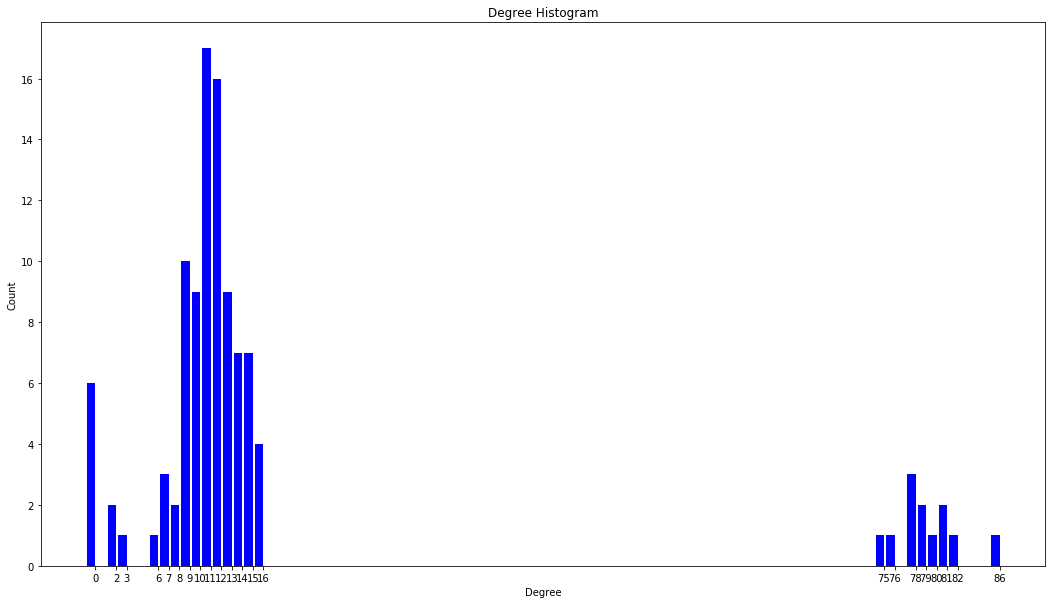

In [104]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

deg

In [95]:
graphs_modularity2 = []
graphs_mindeg = []
min_deg_list = sorted(deg_Gnoise[-12:])
print(min_deg_list)

#G_trimmed_new = G_trim_high
G_trimmed_new = Gnoise

for min_deg in min_deg_list:
    Gtrim_mod = degtrim_min(G_trimmed_new, min_deg)
    G_trimmed_new = Gtrim_mod.G
    graphs_mindeg.append(min_deg)
    graphs_modularity2.append(Gtrim_mod.mod) 

print (graphs_modularity2)
print (graphs_mindeg)


[0, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.09856622116783156, 0.09576382831661806, 0.09154685818877015, 0.09283257378472225, 0.09228032450174148, 0.09141548180658246, 0.08807306885663115, 0.0927847800237812, 0.10036493366774688, 0.0906356807257708, 0.054953954370864005, 0.03145087235996316]
[0, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14]


[0.3403837648683669, 0.3675967372446779, 0.3905365117754817, 0.42418507471725536, 0.4693925925925926, 0.5178831736776343, 0.5783217993079585, 0.6551167052469136, 0.7096210696049449, 0.8224193706499365, 0.8386713444997737]


[Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

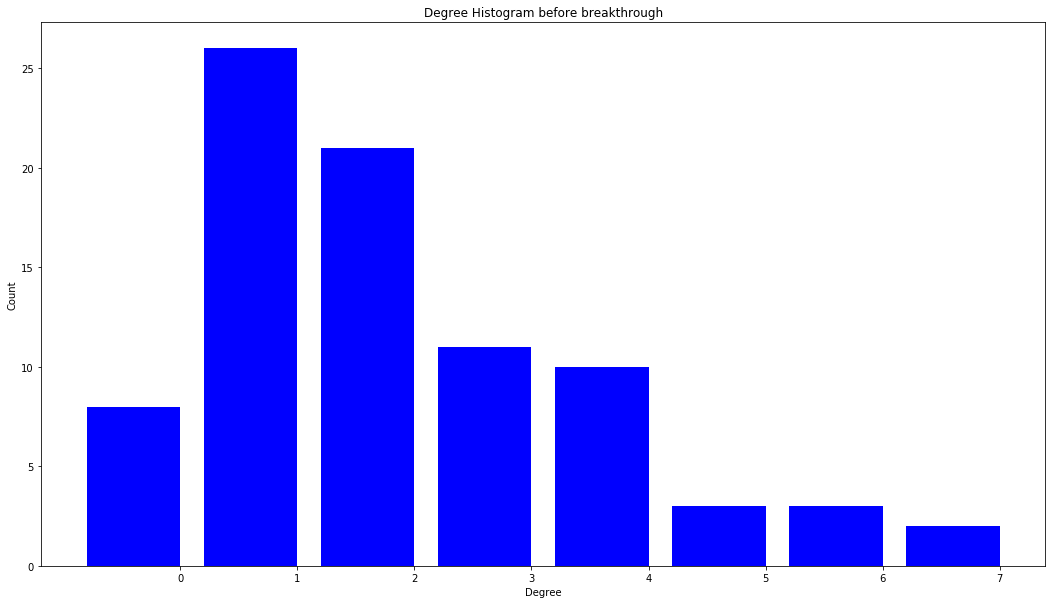

In [15]:
graphs_modularity3 = []

percent_threshold = [0.01, 0.02, 0.05, 0.08, 0.1, 0.13, 0.16, 0.2, 0.25, 0.3, 0.35]

G_trimmed_new = Gnoise
for percent in percent_threshold :
    Gtrim_mod = degtrim_minmax(G_trimmed_new, percent)
    G_trimmed_new = Gtrim_mod.G
    graphs_modularity3.append(Gtrim_mod.mod) 
G_trim = G_trimmed_new

print (graphs_modularity3)

#print(G_trim.nodes())

degree_sequence = sorted([d for n, d in G_trim.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,10))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram before breakthrough")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)



[0.3403837648683669, 0.3675967372446779, 0.3905365117754817, 0.42418507471725536, 0.4693925925925926, 0.5178831736776343, 0.5783217993079585, 0.6551167052469136, 0.7096210696049449, 0.8224193706499365]


[Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

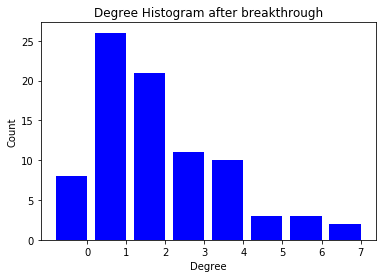

In [17]:
graphs_modularity3 = []

percent_threshold = [0.01, 0.02, 0.05, 0.08, 0.1, 0.13, 0.16, 0.2, 0.25, 0.3] #, 0.35, 0.4]this was for 108

G_trimmed_new = Gnoise
for percent in percent_threshold :
    Gtrim_mod = degtrim_minmax(G_trimmed_new, percent)
    G_trimmed_new = Gtrim_mod.G
    graphs_modularity3.append(Gtrim_mod.mod) 
Gtrim = G_trimmed_new

print (graphs_modularity3)

#print(G_trim.nodes())

degree_sequence = sorted([d for n, d in G_trim.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram after breakthrough")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


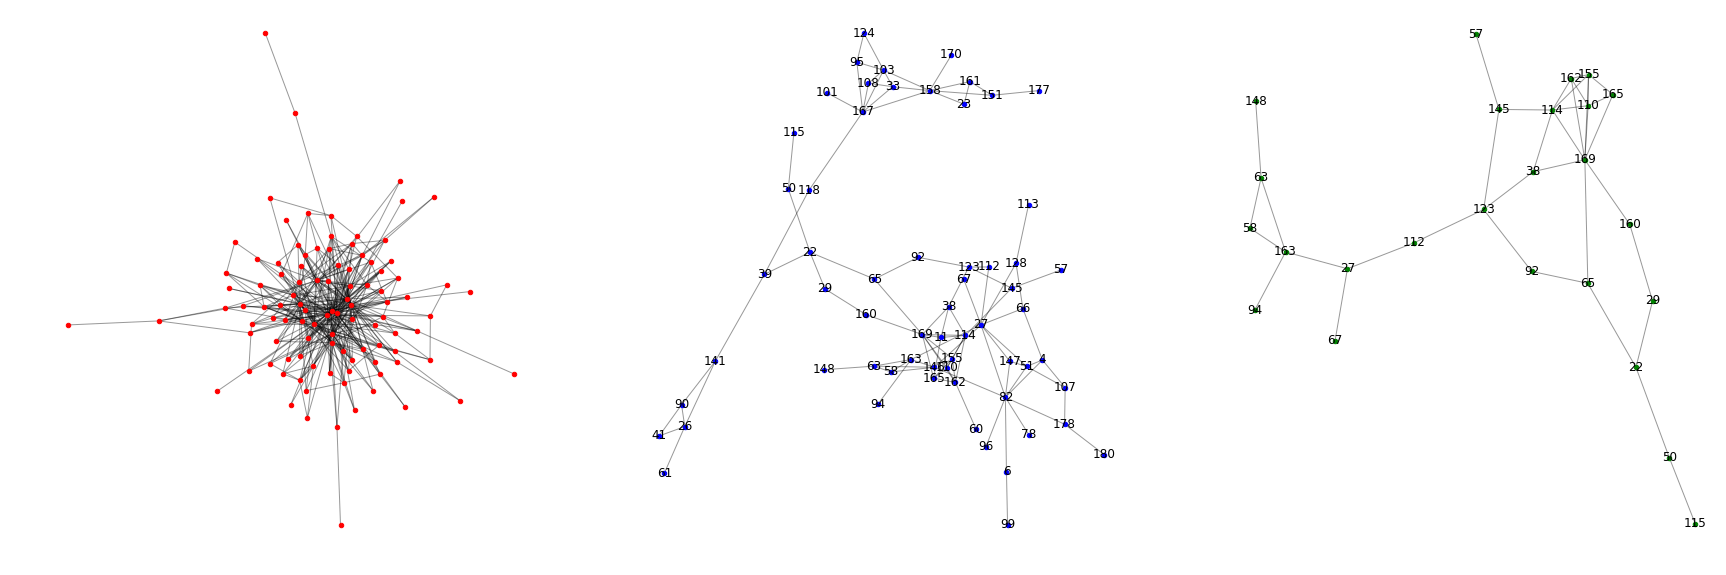

In [18]:
G = lcc_BNU.extract_lcc(Gnoise)

fig, ax = plt.subplots(figsize=(30,10))

plt.title("Gnoise_lcc")

plt.subplot(1, 3, 1)

Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.subplot(1, 3, 2)
G2 = lcc_BNU.extract_lcc(G108)

Gcc = sorted(nx.connected_component_subgraphs(G2), key=len, reverse=True)[0]
pos = nx.spring_layout(G2)
plt.axis('off')
nx.draw_networkx_nodes(G2, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(G2, pos, alpha=0.4)
nx.draw_networkx_labels(G2, pos)

plt.subplot(1, 3, 3)

G3 = lcc_BNU.extract_lcc(Gtrim)
Gcc = sorted(nx.connected_component_subgraphs(G3), key=len, reverse=True)[0]
pos = nx.spring_layout(G3)
plt.axis('off')
nx.draw_networkx_nodes(G3, pos, node_size=20, node_color = 'green',  with_labels = True)
nx.draw_networkx_edges(G3, pos, alpha=0.4)
nx.draw_networkx_labels(G3, pos)

plt.show()



In [19]:
print(set(Gnoise.nodes()) - set(Gtrim.nodes()))
#note here trimming only trimmed nodes that were common in both G108 and G109
#remember to do procrustes!!!!! 

intersecting_108_noise =   set(G108.nodes()).intersection(set(Gnoise.nodes()))
intersecting_all3 =   list(set(intersecting_108_noise).intersection(set(Gtrim.nodes())))

print(len(intersecting_108_noise))
print(len(intersecting_all3))

{'48', '98', '62', '118', '147', '78', '70', '47', '60', '178', '109', '132', '11', '18', '116', '180', '146', '101', '39', '76'}
106
86


In [20]:
max_dim_ase = 2

ase_G108 = ase_graph(G108)
ase_Gnoise = ase_graph(Gnoise)
ase_Gtrim = ase_graph(Gtrim)


In [21]:

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_G108.vertex_labels.index(v))
Xhat108_shared = ase_G108.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_Gnoise.vertex_labels.index(v))
XhatNoise_shared = ase_Gnoise.Xhat[intersecting_index]

intersecting_index = []
for v in intersecting_all3:
    intersecting_index.append(ase_Gtrim.vertex_labels.index(v))
XhatTrim_shared = ase_Gtrim.Xhat[intersecting_index]

In [22]:
#procrustes
W_Noise_108 = procrustes(XhatNoise_shared, Xhat108_shared)
XhatNoise_shared_proj = XhatNoise_shared@W_Noise_108 


W_Trim_108 = procrustes(XhatTrim_shared, Xhat108_shared)
XhatTrim_shared_proj = XhatTrim_shared@W_Trim_108 


In [23]:

Xhat_108_Noise = Xhat108_shared - XhatNoise_shared_proj 
diff_108_Noise = np.linalg.norm(Xhat_108_Noise, axis=1)

In [24]:
#diff_108_Noise

In [25]:
Xhat_108_Trim = Xhat108_shared - XhatTrim_shared_proj 
diff_108_Trim = np.linalg.norm(Xhat_108_Trim, axis=1)
#diff_108_Trim

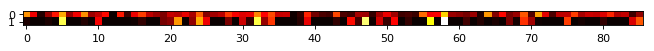

In [26]:
a = np.array(diff_108_Noise)
b = np.array(diff_108_Trim)
m = np.vstack((a,b))
#m1 = np.asmatrix(m)
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(m, cmap='hot', interpolation='nearest')
plt.show()
#black means small number

(array([ 6., 11.,  8., 21., 12., 11.,  7.,  3.,  5.,  2.]),
 array([1.16453626e-53, 7.63072763e-02, 1.52614553e-01, 2.28921829e-01,
        3.05229105e-01, 3.81536382e-01, 4.57843658e-01, 5.34150934e-01,
        6.10458210e-01, 6.86765487e-01, 7.63072763e-01]),
 <a list of 10 Patch objects>)

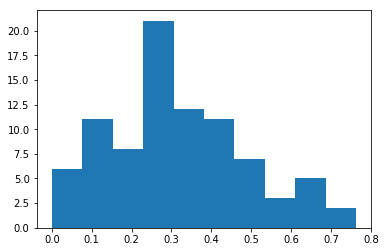

In [27]:
plt.hist(a)

(array([60.,  4.,  5.,  6.,  4.,  1.,  1.,  1.,  3.,  1.]),
 array([0.        , 0.1116793 , 0.22335859, 0.33503789, 0.44671718,
        0.55839648, 0.67007577, 0.78175507, 0.89343437, 1.00511366,
        1.11679296]),
 <a list of 10 Patch objects>)

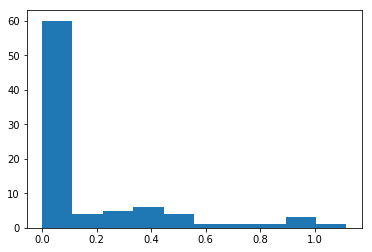

In [28]:
plt.hist(b)

In [29]:
diff_108_Noise

array([6.53092088e-01, 3.86326903e-01, 4.28864700e-02, 2.39128425e-01,
       4.43173266e-01, 6.92869017e-01, 2.37040378e-01, 3.89363403e-01,
       6.48592742e-01, 2.47241012e-01, 3.04405837e-01, 4.20250824e-01,
       1.16453626e-53, 4.46171035e-01, 8.42738796e-02, 3.80786897e-01,
       5.06333812e-01, 2.97035892e-01, 2.43989999e-01, 1.95908977e-01,
       3.18218406e-01, 2.94162773e-01, 3.72788815e-01, 2.68165864e-01,
       5.65634945e-01, 2.12824231e-01, 2.55863089e-01, 2.96177628e-01,
       5.00249201e-01, 4.01022617e-01, 3.57801538e-01, 3.76408780e-01,
       6.19651006e-01, 4.07843944e-01, 5.31099569e-01, 3.15715896e-01,
       3.23745027e-01, 1.14206724e-02, 6.97039508e-02, 4.63496046e-01,
       1.78440994e-01, 1.12862647e-01, 9.22850748e-02, 5.27557548e-01,
       1.13753527e-01, 9.54453576e-02, 2.65764373e-01, 2.44887805e-01,
       7.25017208e-02, 2.51430675e-01, 3.83178221e-01, 2.51724738e-01,
       8.79381573e-02, 1.07182020e-01, 8.15265890e-02, 5.85730243e-01,
      

In [30]:
rank_trim = []
rank_noise = []

idx = 1 
for idx in range(Xhat108_shared.shape[0]):
    distance_to_noisy = XhatNoise_shared_proj - Xhat108_shared[idx,]
    diff_Noise_108v = np.linalg.norm(distance_to_noisy, axis=1)
    distance_to_trim = XhatTrim_shared_proj - Xhat108_shared[idx,]
    diff_Trim_108v = np.linalg.norm(distance_to_trim, axis=1)
    rank_trim.append(diff_Trim_108v.argsort()[0]) 
    rank_noise.append(diff_Noise_108v.argsort()[0])


delta_rank = np.array(rank_noise) - np.array(rank_trim)

In [31]:
diff_Noise_108v.argsort()

array([12, 63, 37, 38,  2, 23, 54, 14, 52, 19, 84, 42, 45, 41, 73, 44, 48,
       34,  8, 67, 40, 61, 70, 60, 85,  6, 59, 62, 18, 47,  9, 65, 26,  5,
       53, 16, 82, 24,  3, 21, 77, 27, 17, 69, 74, 75, 10, 79, 83, 35, 68,
       78, 36, 51, 25, 46, 72, 22, 28,  1,  7, 31, 49, 56, 15, 29, 57, 33,
       66, 11, 20, 43,  0, 50,  4, 13, 39, 81, 76, 58, 80, 30, 55, 71, 32,
       64])

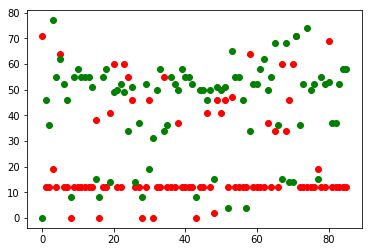

In [32]:
plt.plot(np.array(rank_noise), 'ro')
plt.plot(np.array(rank_trim), 'go')


In [33]:
delta_rank_original = np.array([  2,  51,  51,  44,  25,  51, -26,  21,  51,  27,  51,  51,  -1,
       -13, -30,  27, -13,  51,  25,  34, -29, -37,  34,   4, -20,  34,
        44,  33, -29,  51,  33, -24,  51,  -4, -46,  51, -29,  25,   4,
        33,  -4, -20,  51,  51,  -4, -12,  34,  25,  -1, -24,  -1,  34,
        45,  -1,  -1,   8,  27,  51,  51, -10, -13, -57, -29,  51,  -8,
        14, -24,  33,  27, -55,  27])

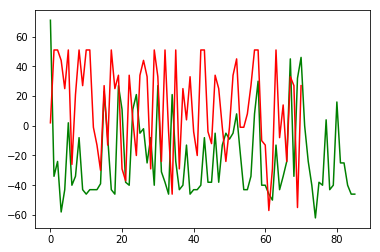

In [34]:
plt.plot(delta_rank, 'g')
plt.plot(delta_rank_original, 'r')

In [35]:
delta_rank

array([ 71, -34, -24, -58, -43,   2, -40, -34,  -8, -43, -46, -43, -43,
       -43, -39,  23,  -8, -43, -46,  27,  11, -38, -40,  11,  21,  -5,
        -2, -25,  -8, -40,  27, -31, -38, -46,  21, -24, -43, -40, -13,
       -46, -43, -43, -40,  -8, -38, -38,  -5, -38, -13,  -5,  -9,  -5,
         8, -18, -43, -43, -34,   8,  30, -40, -40, -46, -50, -13, -43,
       -34, -24,  45, -34,  32,  46,   0, -24, -40, -62, -38, -40,   4,
       -43, -40,  16, -25, -25, -40, -46, -46])

In [36]:
delta_rank_sign = delta_rank
delta_rank_sign[delta_rank_sign < 0] = 0
delta_rank_sign[delta_rank_sign > 0] = 1

In [37]:
delta_rank_sign

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [38]:
delta_rank_original_sign = delta_rank_original
delta_rank_original_sign[delta_rank_original_sign < 0] = 0
delta_rank_original_sign[delta_rank_original_sign > 0] = 1

In [39]:
delta_rank_original_sign

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1])

In [40]:
df_artificial =  pd.DataFrame(columns = ['rank_delta', 'Type'])
df_artificial['rank_delta'] = delta_rank
df_artificial['Type'] = np.repeat('Artificial', len(delta_rank))

df_original = pd.DataFrame(columns = ['rank_delta', 'Type'])
df_original['rank_delta'] = delta_rank_original
df_original['Type'] = np.repeat('Observed', len(delta_rank_original))


df_rank = df_artificial.append(df_original, ignore_index=True)

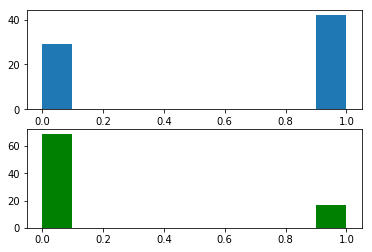

In [41]:
# Iterate through the five airlines

plt.subplot(2, 1, 1)
for i in ['Observed']: #, 'Artificial']:
    
    # Subset to the airline
    data =   delta_rank_original#(df_rank.loc[df_rank['Type'] == i])
    # Draw the density plot
    plt.hist(data) #, label = i)

    
plt.subplot(2, 1, 2)    
# Iterate through the five airlines
for i in ['Artificial']: #, 'Artificial']:
    
    # Subset to the airline
    data =   delta_rank#(df_rank.loc[df_rank['Type'] == i])
    # Draw the density plot
    plt.hist(data, color='green') #, label = i)    

TypeError: unsupported operand type(s) for +: 'int' and 'str'

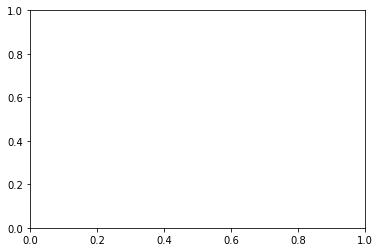

In [277]:
#wsign test p-value 



# Iterate through the five airlines
for i in ['Observed', 'Artificial']:
    # Subset to the airline
    data = (df_rank.loc[df_rank['Type'] == i])
    # Draw the density plot
    sns.distplot(data, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')